# EDA 3

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Relaciones-entre-dos-variables-numéricas." data-toc-modified-id="Relaciones-entre-dos-variables-numéricas.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Relaciones entre dos variables numéricas.</a></span><ul class="toc-item"><li><span><a href="#Scatterplot" data-toc-modified-id="Scatterplot-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Scatterplot</a></span></li><li><span><a href="#Regplot" data-toc-modified-id="Regplot-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Regplot</a></span></li><li><span><a href="#Matriz-de-correlación-y-Heatmap" data-toc-modified-id="Matriz-de-correlación-y-Heatmap-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Matriz de correlación y Heatmap</a></span></li><li><span><a href="#Joinplot" data-toc-modified-id="Joinplot-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Joinplot</a></span></li></ul></li><li><span><a href="#Relaciones-entre-dos-variables-categóricas." data-toc-modified-id="Relaciones-entre-dos-variables-categóricas.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Relaciones entre dos variables categóricas.</a></span><ul class="toc-item"><li><span><a href="#Countplot" data-toc-modified-id="Countplot-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Countplot</a></span></li></ul></li><li><span><a href="#Relaciones-entre-variable-numérica-y-categórica." data-toc-modified-id="Relaciones-entre-variable-numérica-y-categórica.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Relaciones entre variable numérica y categórica.</a></span><ul class="toc-item"><li><span><a href="#Swarmplot" data-toc-modified-id="Swarmplot-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Swarmplot</a></span></li><li><span><a href="#Violinplot" data-toc-modified-id="Violinplot-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Violinplot</a></span></li><li><span><a href="#Pointplot" data-toc-modified-id="Pointplot-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Pointplot</a></span></li><li><span><a href="#Boxplot" data-toc-modified-id="Boxplot-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Boxplot</a></span></li></ul></li></ul></div>

La visualización es una parte esencial del análisis de datos. Como análista de datos, pasamos una parte importante del tiempo haciendo gráficos para entender los datos y las relaciones entre ellos. A lo largo de esta clase veremos cuales son los tipos de gráficos más útiles para nosotras como analistas. 

Elegir uno que describa las relaciones en sus datos con precisión puede ser complicado, en este jupyter veremos los principales tipos de datos que podremos usar en esta fase del análisis exploratorio. 

Principalmente aprenderemos qué tipos de gráficas hay y cómo interpretarlas. Este jupyter lo dividivideremos en tres partes: 

- Relaciones entre variables numéricas. 
- Relaciones entre variables categóricas. 
- Relaciones entre variable numérica y categórica.


In [20]:
# lo primerito de todo importar las librerías que necesitaremos durante la lección

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# establecer el tamaño nuestras figuras
plt.rcParams["figure.figsize"] = (10,8)

# en esta lección nos van a salir muchos warning al hacer las gráficas. Para evitar que nos salgan todo el rato podemos ejecutar las siguientes lineas de código
import warnings
warnings.filterwarnings('ignore')

En esta lección seguiremos trabajando con el *DataFrame* de datos de los estudiantes. Lo cargamos 👇🏽: 

In [21]:
df = pd.read_csv("files/students.csv", index_col = 0)

In [22]:
nuevas_columnas = {col: col.replace(" ", "_") for col in df.columns}
df.rename(columns = nuevas_columnas, inplace = True)

In [23]:
df.head(2)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,NaN


In [24]:
categoricas = df.select_dtypes(include = "object")

In [25]:
categoricas.head(2)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed


In [29]:
numericas = df.select_dtypes(include = np.number)

In [42]:
numericas.head(2)

,math_score,reading_score,writing_score
0,72.0,72.0,74.0
1,69.0,90.0,NaN


## Relaciones entre variables numéricas

A modo de recordatorio, las variables numéricas o continuas son aquellas que tienen un número infinito de valores entre dos valores cualesquiera. Una variable continua puede ser numérica: por ejemplo la altura o la longitud de una pieza. 

### Scatterplot 

El gráfico de dispersión ayuda a visualizar dos variables numéricas. Ayuda a identificar la relación de los datos con cada variable, es decir, la correlación o los patrones de tendencia. También ayuda a detectar los valores atípicos en el gráfico.

**Cuándo utilizarlo**: Se utiliza en conceptos de aprendizaje automático como la regresión, donde `x` e `y` son variables continuas. También se utiliza en la agrupación de dispersiones o en la detección de valores atípicos.

In [38]:
len(df['math_score'])

1000

In [40]:
df['math_score'].isnull().sum()

10

In [41]:
df['reading_score'].isnull().sum()

1

In [39]:
len(df['reading_score'])

1000

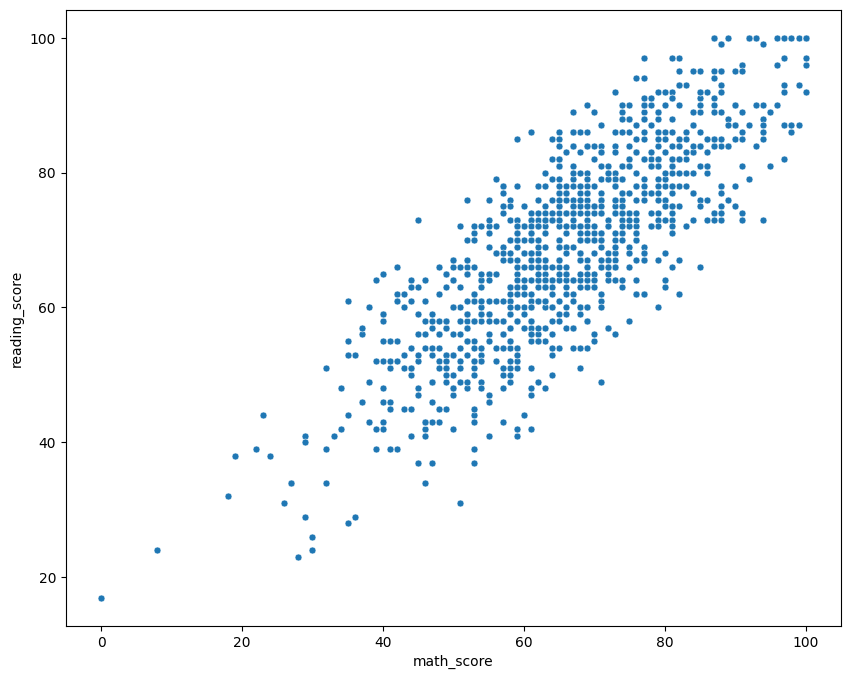

In [43]:
sns.scatterplot(x= 'math_score', y = 'reading_score', data = df,
                s = 25) # tamaño de los marcadores   
plt.show(); 

**Interpretación**: esta gráfica nos está mostrando la relación que existe entre las variables `math_score` y `reading_score`. En este caso, vemos que hay una tendencia positiva, es decir, aquellos alumnos que tuvieron mayores notas en matemáticas también las tuvieron en la parte de lectura. 

A este gráfico le podemos meter un parámetro nuevo que es el `hue` que nos va a permitir plotear los puntos en función de una variable categórica

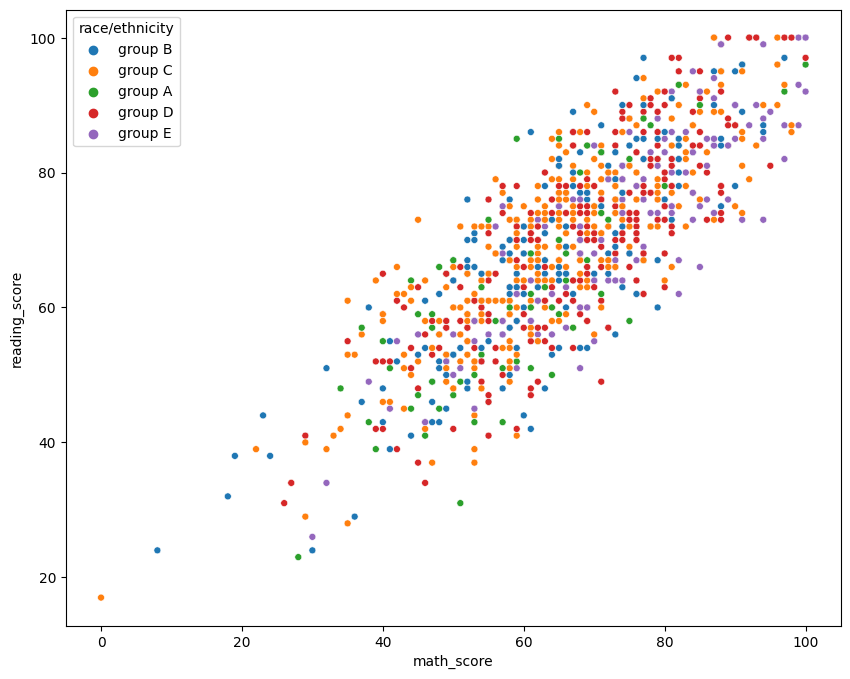

In [44]:
sns.scatterplot(x = 'math_score', y = 'reading_score', data = df,
                s = 25, # tamaño de los marcadores   
                hue = 'race/ethnicity') # puntos de distintos colores en función de la variable que indiquemos  
plt.show(); 

**Interpretación** : en este caso tenemos 5 grupos en función de la raza, cada uno de los grupos se ha ploteado de un color diferente. Como podemos ver, no parece que haya diferencias entre razas ya que no podemos encontrar ningún patrón claro. 

Sin embargo, ¿Qué pasaría si lo hacemos con el género? 

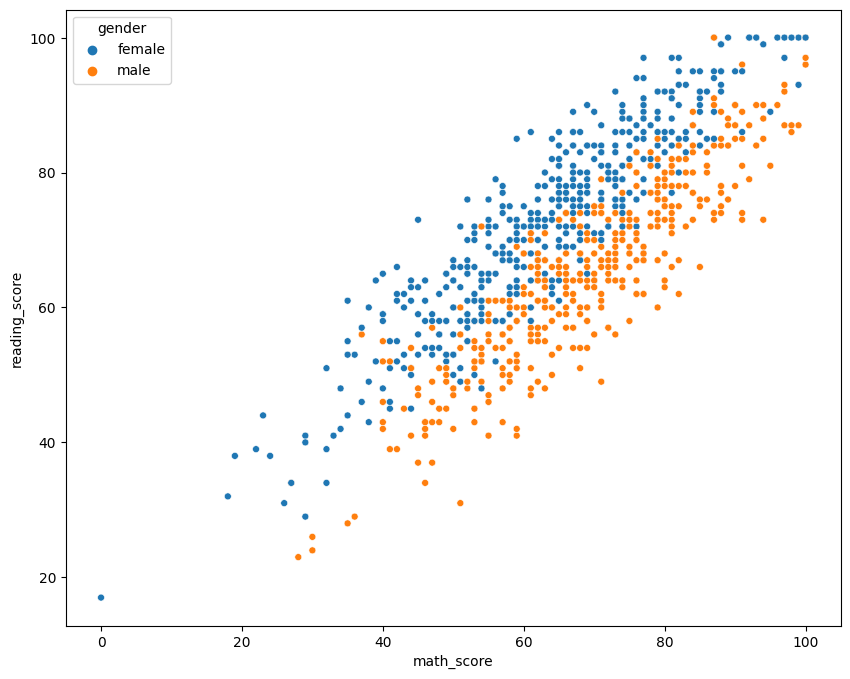

In [45]:
sns.scatterplot(x = 'math_score', y ='reading_score', data = df,
                s = 25, # tamaño de los marcadores   
                hue = 'gender') # puntos de distintos colores en función de la variable que indiquemos  
plt.show(); 

**Interpretación**: en este caso sí que vemos claras diferencias entre sexos. Ahora estamos viendo como las mujeres tienden a tener mejores notas en lectura que los hombres 🚀! 

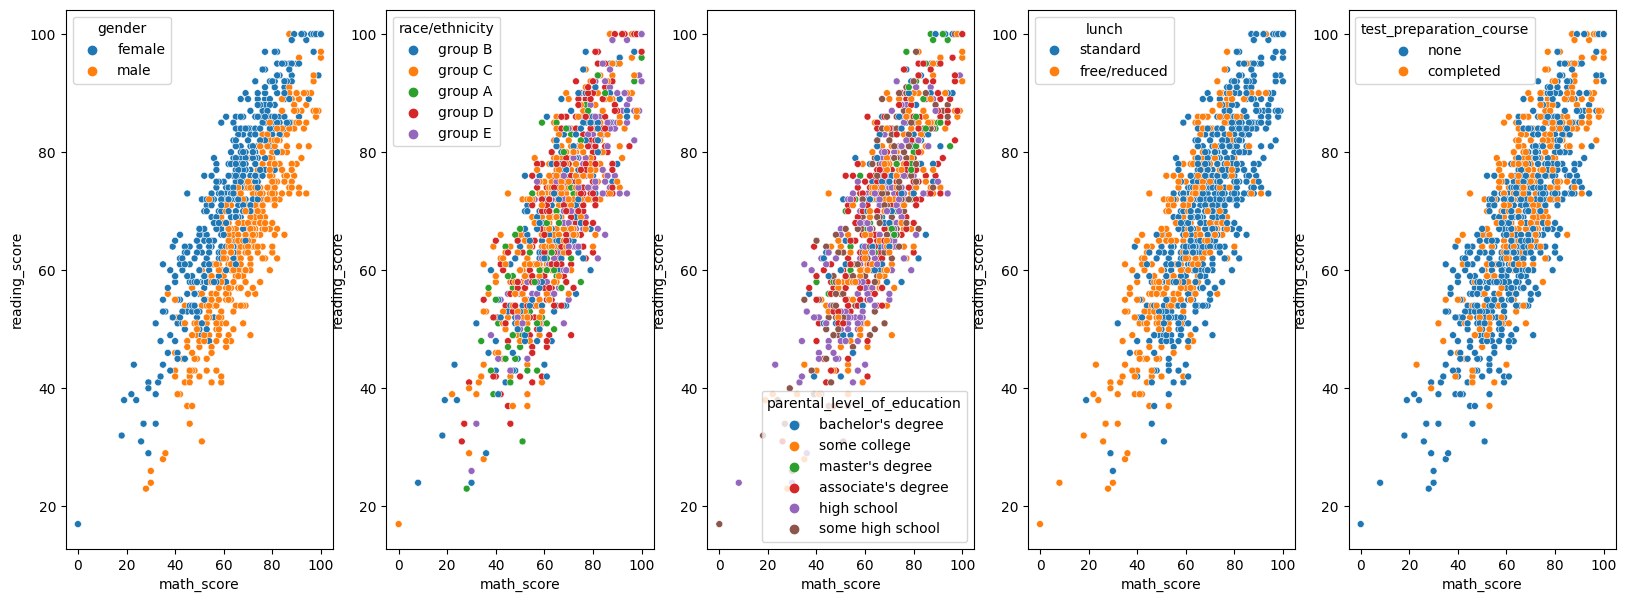

In [46]:
fig, axes = plt.subplots(1, 5, figsize=(20,7))

for i in range(len(categoricas.columns)): 
    sns.scatterplot(x = 'math_score', y = 'reading_score', data = df,
                    s = 25, # tamaño de los marcadores   
                    hue = categoricas.columns[i], 
                    ax=axes[i]) # puntos de distintos colores en función de la variable que indiquemos  
plt.show(); 

**Interpretación** viendo todo el contexto para las variables `math_score` y `reading_score` vemos que hay un patrón claro para el género como vimos antes. Para el resto de las variables, sin embargo, no se observan patrones muy claros. 

Lo mismo podemos hacer para las otras relaciones de variables numéricas:  

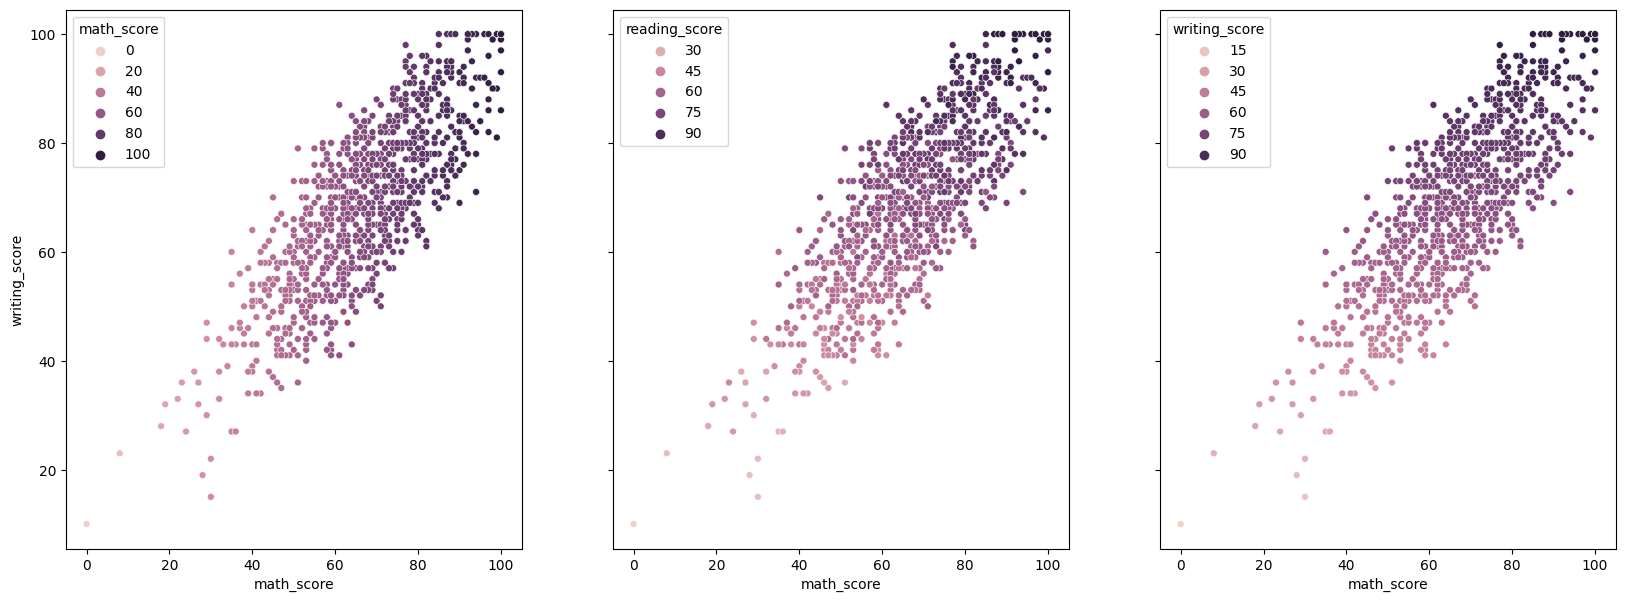

In [49]:
fig, axes = plt.subplots(1, 3, figsize=(20,7), sharey = True)

for i in range(len(numericas.columns)): 
    sns.scatterplot(x ='math_score', y = 'writing_score', data = df,
                    s = 25, 
                    hue = numericas.columns[i], 
                    ax=axes[i]) 
plt.show(); 

**Interpretación**: como observamos, encontramos los mismos patrones que en el caso anterior. 

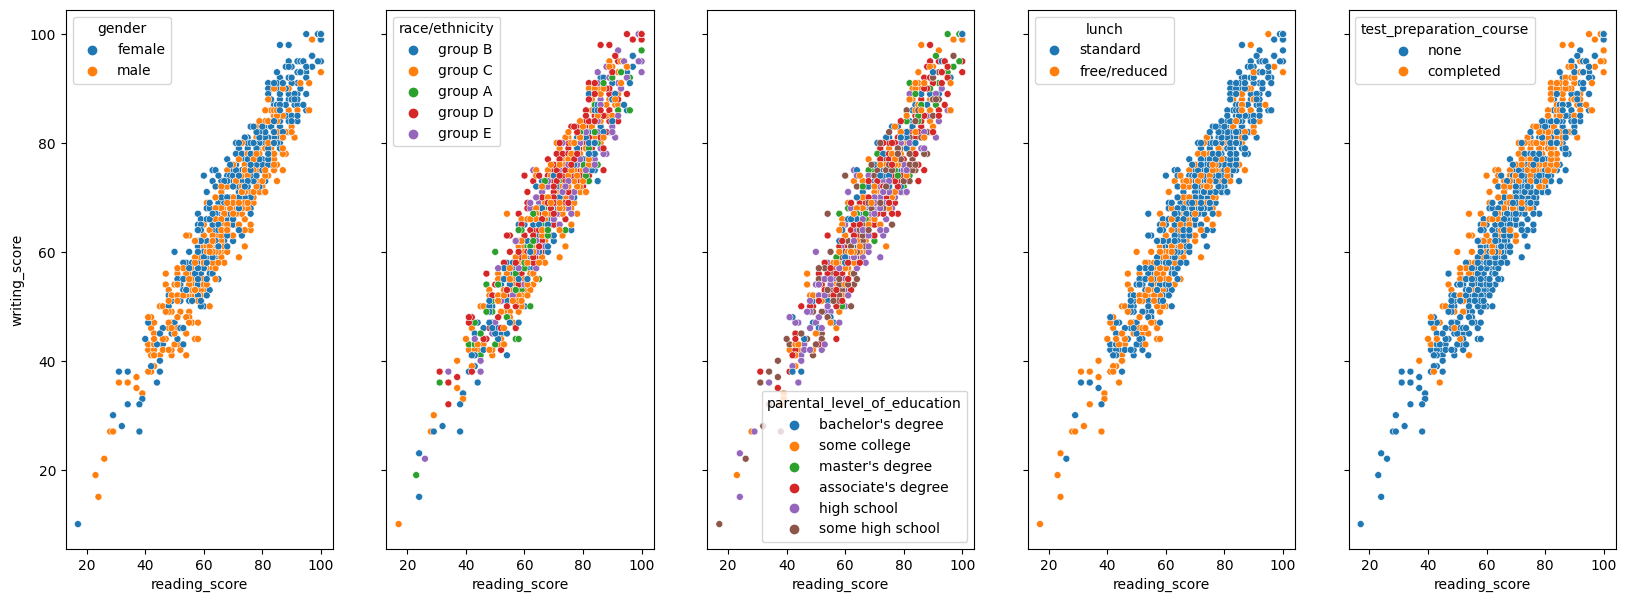

In [51]:
fig, axes = plt.subplots(1, 5, figsize=(20,7), sharey = True)

for i in range(len(categoricas.columns)): 
    sns.scatterplot(x ='reading_score', y ='writing_score', data = df,
                    s = 25,  
                    hue = categoricas.columns[i], 
                    ax=axes[i])   
plt.show(); 

**Interpretación**: en este caso estamos ploteando la relación entre `reading_score` y `writing_score`. De nuevo se sigue manteniendo esa tendencia positiva, pero en este caso en el caso del género no se observan esas diferencias tan claras entre sexos. 

Por otro lado, en la última figura donde encontramos la relación de las notas con que se hayan preparado la prueba o no, vemos que en general, aquellas personas que no se han preparado el test tienen notas mas bajas (puntos azules en las gráficas). 

### Regplot

Nos va a mostrar un diagrama de dispersión (*scatterplot*) más la línea de regresión ajustada para los datos. Esto nos va a permitir encontrar la mejor función de la recta que te permita predecir el valor de una variable sabiendo los valores de otra variable que observes. Imaginemos que queremos predecir cuál será la nota de un alumno en escritura sabiendo lo que ha sacado en la prueba matemática. Lo que haremos será ir sobre la recta y en función del valor conocido sacar el de la nota en escritura.

**Cuando utilizarlo**: lo vamos a usar cuando queramos graficar nuestros datos ajustandolos a un modelo de regresión lineal.


<AxesSubplot:xlabel='reading_score', ylabel='writing_score'>

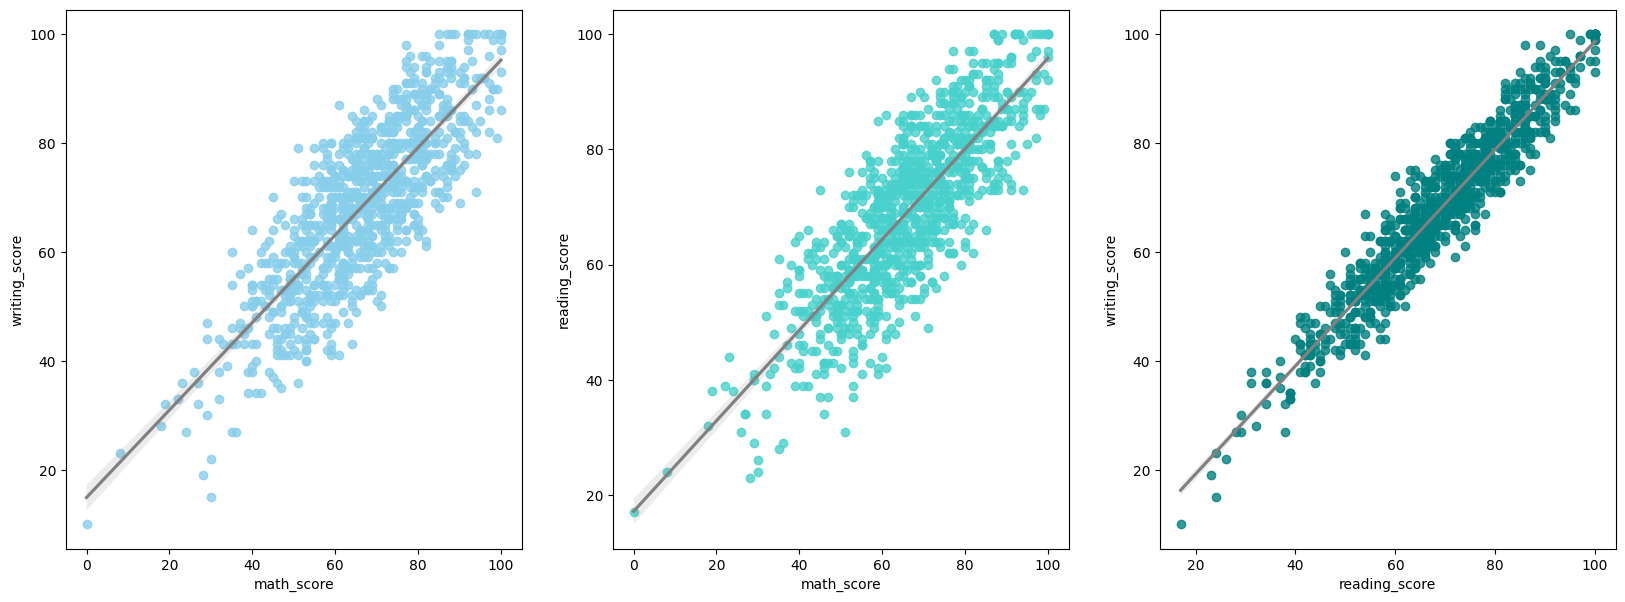

In [53]:
fig, axes = plt.subplots(1, 3, figsize=(20,7))

sns.regplot(x ="math_score",  y ="writing_score", data = df, scatter_kws={"color": "skyblue"},line_kws={"color": "grey"}, ax = axes[0])
sns.regplot(x ="math_score",  y ="reading_score", data = df, scatter_kws={"color": "mediumturquoise"},line_kws={"color": "grey"}, ax = axes[1])
sns.regplot(x ="reading_score",  y ="writing_score", data = df, scatter_kws={"color": "teal"},line_kws={"color": "grey"}, ax = axes[2])

**Interpretación** : en este caso lo interpretaremos de una forma similar al scatterplot. Es decir, lo que nos esta mostrando es que hay una relación positiva entre cada una de las variables que estamos evaluando. 

### Matriz de correlación y Heatmap

En Pandas tenemos el método `.corr()` que nos devuelve la correlación que existe entre nuestras variables numéricas. A modo de recordatorio, en el *heatmap* cada fila y columna representa una variable, y cada valor/color de esta matriz es el coeficiente de correlación entre las variables representadas por la fila y columna correspondientes.

**Cuando usarlo**: son ideales para evaluar la correlación entre las variables, ya que hace que los patrones sean fácilmente legibles y resalta las diferencias y variaciones en los mismos datos.
 

In [ ]:
df.corr()

,math_score,reading_score,writing_score
math_score,1.000000,0.817247,0.803961
reading_score,0.817247,1.000000,0.954161
writing_score,0.803961,0.954161,1.000000


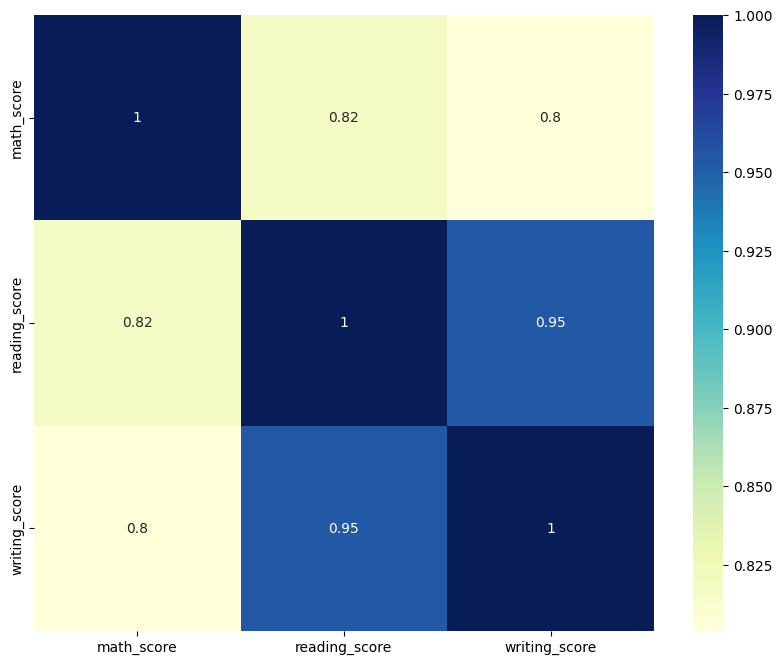

In [34]:
# hagamos el heatmap

sns.heatmap(df.corr(),
            cmap = "YlGnBu", # para cambiar el color
            annot = True); # para sacar el valor de la correlación

En caso de que solo queramos sacar una parte de la matriz:

In [35]:
# creamos un dataframe todo de unos de la misma forma que nuestra matriz de correlación

mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
mask

array([[ True,  True,  True],
       [False,  True,  True],
       [False, False,  True]])

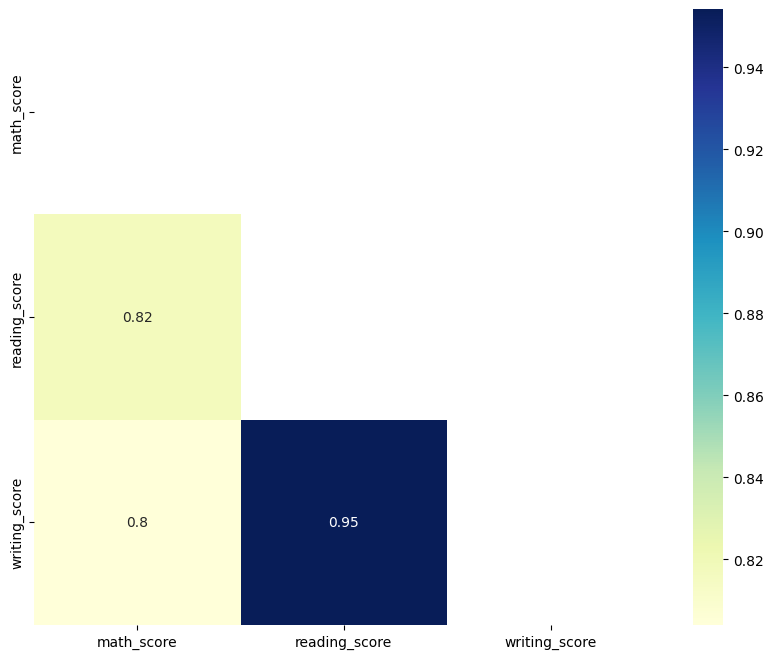

In [36]:
sns.heatmap(df.corr(),
            cmap = "YlGnBu", # para cambiar el color
            mask = mask, 
            annot = True); # para sacar el valor de la correlación
            

**Interpretación**: en este caso estamos viendo la correlación que existe entre cada una de nuestras variables numéricas. De esta forma: 

- La variable `math_score` y `writing_score` tienen una correlación de 0.8. 
- La variable `math_score` y `reading_score` tienen una correlación de 0.82.
- La variable `reading_score` y `writing_score` tienen una correlación de 0.95. 

Pero... ¿Qué significa esto? 🤔

- Los valores cercanos a +1 indican la presencia de una fuerte relación positiva entre `X` e `Y`, mientras que los cercanos a -1 indican una fuerte relación negativa entre `X` e `Y`.

    - Si la correlación es positiva: si el valor de una de las variables aumenta, el valor de la otra variable aumenta también.
    - Si la correlación es negativa: si el valor de una de las variables aumenta, el valor de la otra variable disminuye. 

- Los valores cercanos a cero significan que no existe ninguna relación entre `X` e `Y`.

Por lo tanto, en nuestros resultados, vemos que todas las variables presentan una fuerte correlación positiva, es decir, cuando aumenta una, aumenta la otra. 


### Jointplot

Nos permite básicamente emparejar dos gráficos para datos bivariados. Con la elección del parámetro `kind` elegimos el tipo de gráfico con que queremos comparar los histogramas:

- `scatter`: será un gráfico de tipo *scatterplot*
- `reg`: será un plot de tipo *regplot*
- `resid`: va a plotear los valores de nuestros residuos uando ajustamos nuestros datos a una regresión lineal
- `kde`: muestra un plot de tipo *kde*
- `hex`: será como un *scatterplot* pero los puntos seran hexágonos. 

**Cuando usarlo**: lo usaremos cuando queramos conocer la relación entre dos variables y la distribución de cada una de ellas por separado. 

In [59]:
tipos = ["scatter", "reg", "resid", "kde"]

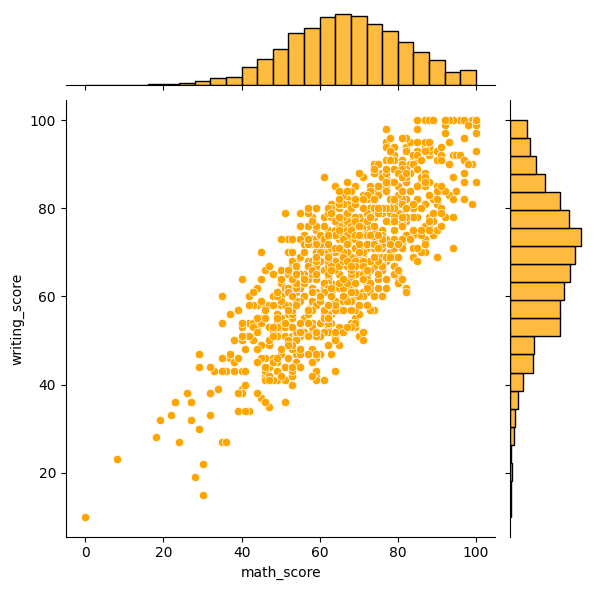

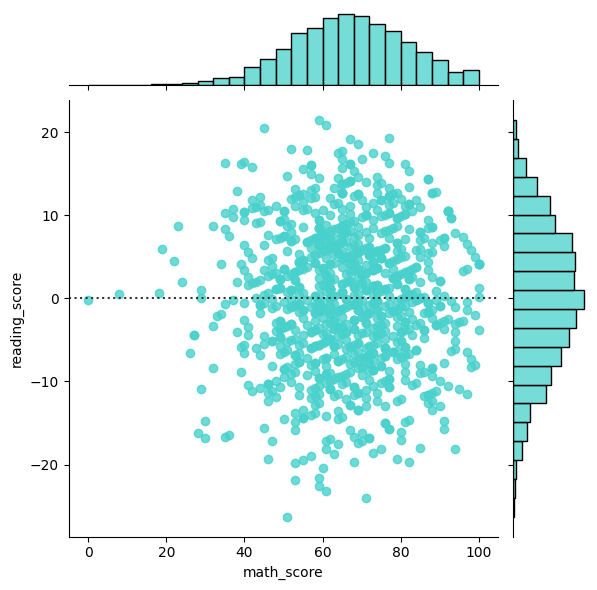

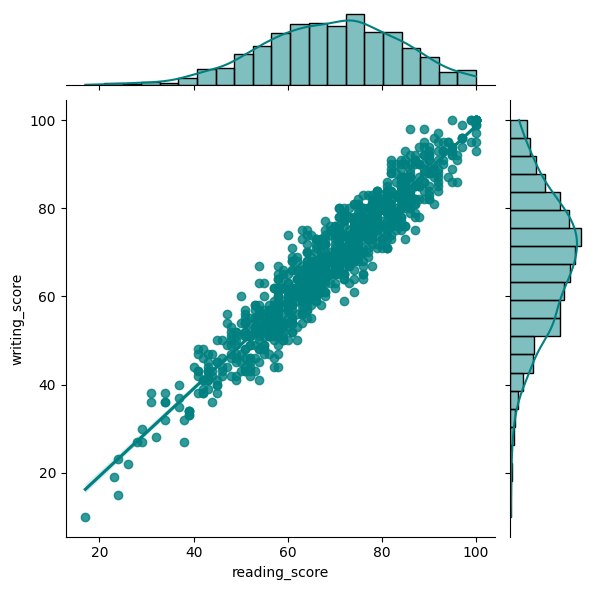

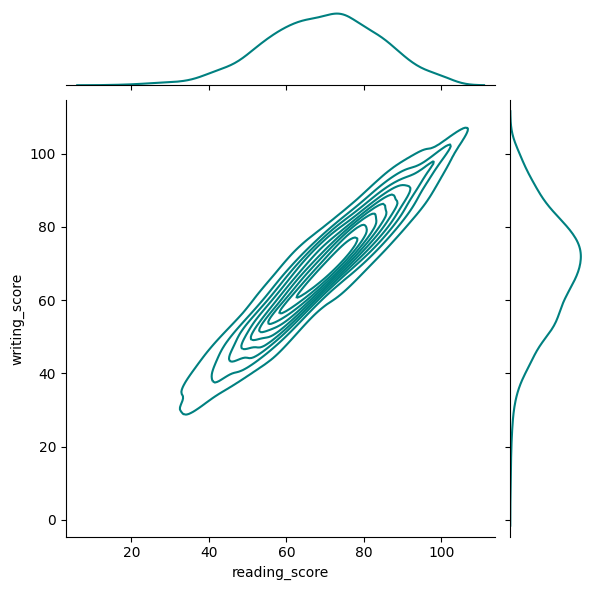

In [66]:
sns.jointplot(x="math_score",  y="writing_score", data = df, color = "orange", kind = "scatter"); 
sns.jointplot(x="math_score",  y ="reading_score", data = df, color = "mediumturquoise",kind = "resid"); 
sns.jointplot(x ="reading_score",  y="writing_score", data = df, color = "teal", kind = "reg"); 
sns.jointplot(x ="reading_score",  y="writing_score", data = df, color = "teal", kind = "kde"); 

## Relaciones entre dos variables categóricas

Las variables categóricas recordamos son aquellas contienen un número finito de categorías o grupos distintos. Los datos categóricos pueden no tener un orden lógico. Por ejemplo sexo, tipo de material y método de pago.

In [63]:
categoricas.head(2)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed


### Countplot

Un countplot traza la frecuencia de los puntos de datos en cada categoría. Es útil para entender el recuento de los rangos de datos y se usa para variables categóricas. 

**Cuándo utilizarlo**: Debemos utilizar el histograma cuando necesitemos el recuento de la variable en un gráfico.

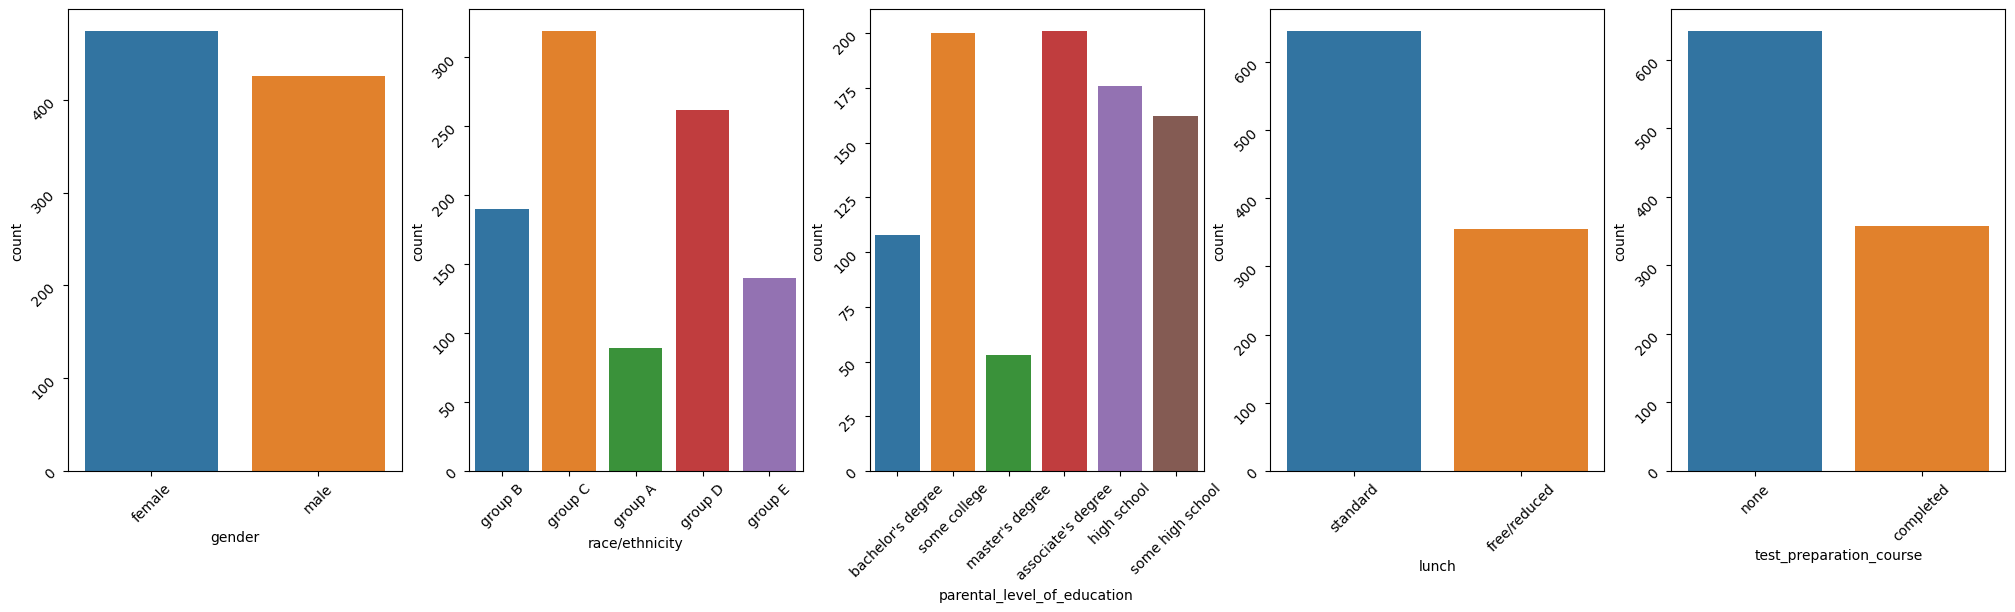

In [64]:
fig, axes = plt.subplots(1, 5, figsize=(25,6))

for ax in fig.axes:
    ax.tick_params(labelrotation=45)

for i in range(len(categoricas.columns)):
    sns.countplot(x = categoricas.columns[i], data = df, ax=axes[i]); 
plt.show(); 

**Interpretación**: como hemos dicho nos va a devolver las veces que aparece cada categoría de cada una de nuestras variables en nuestro *DataFrame*. De esta forma: 

- Para la columna de `gender` podemos ver que hay más estudiantes femeninas que masculinos. 


- En la columna `race` podemos ver que hay una raza que domina (grupo C), mientras que los alumnos de la raza perteneciente al grupo A son los que menos aparecen. 


- En cuanto a `parental_level_of_education` vemos que hay 4 tipos de nivel de estudios que dominan, mientras que padres con master son los que menos aparecen. 


- Relacionado con `lunch` tenemos dos tipos de categorías y vemos que principalmente en nuestro set de datos tenemos principalmente alumnos con comida "standard"


- Por último, respecto a `test_preparation_course` vemos que gran parte de los alumnos no se han hecho el test de preparación del curso. 

Con esto ya nos hemos familiarizado en como son nuestras variables categóricas, cuantos tipos de categorías tenemos y como están "repartidas" en nuestro *dataset*. 

En este tipo de gráfica también podemos incluir el parámetro `hue`. Exploremos que relación existe entre nuestras variables categóricas y el género. 

In [ ]:
categoricas.iloc[:,1:]

,race/ethnicity,parental_level_of_education,lunch,test_preparation_course
0,group B,bachelor's degree,standard,none
1,group C,some college,standard,completed
2,group B,master's degree,standard,none
3,group A,associate's degree,free/reduced,none
4,group C,some college,standard,none
...,...,...,...,...
995,group E,master's degree,standard,completed
996,group C,high school,free/reduced,none
997,group C,high school,free/reduced,completed
998,group D,some college,standard,completed


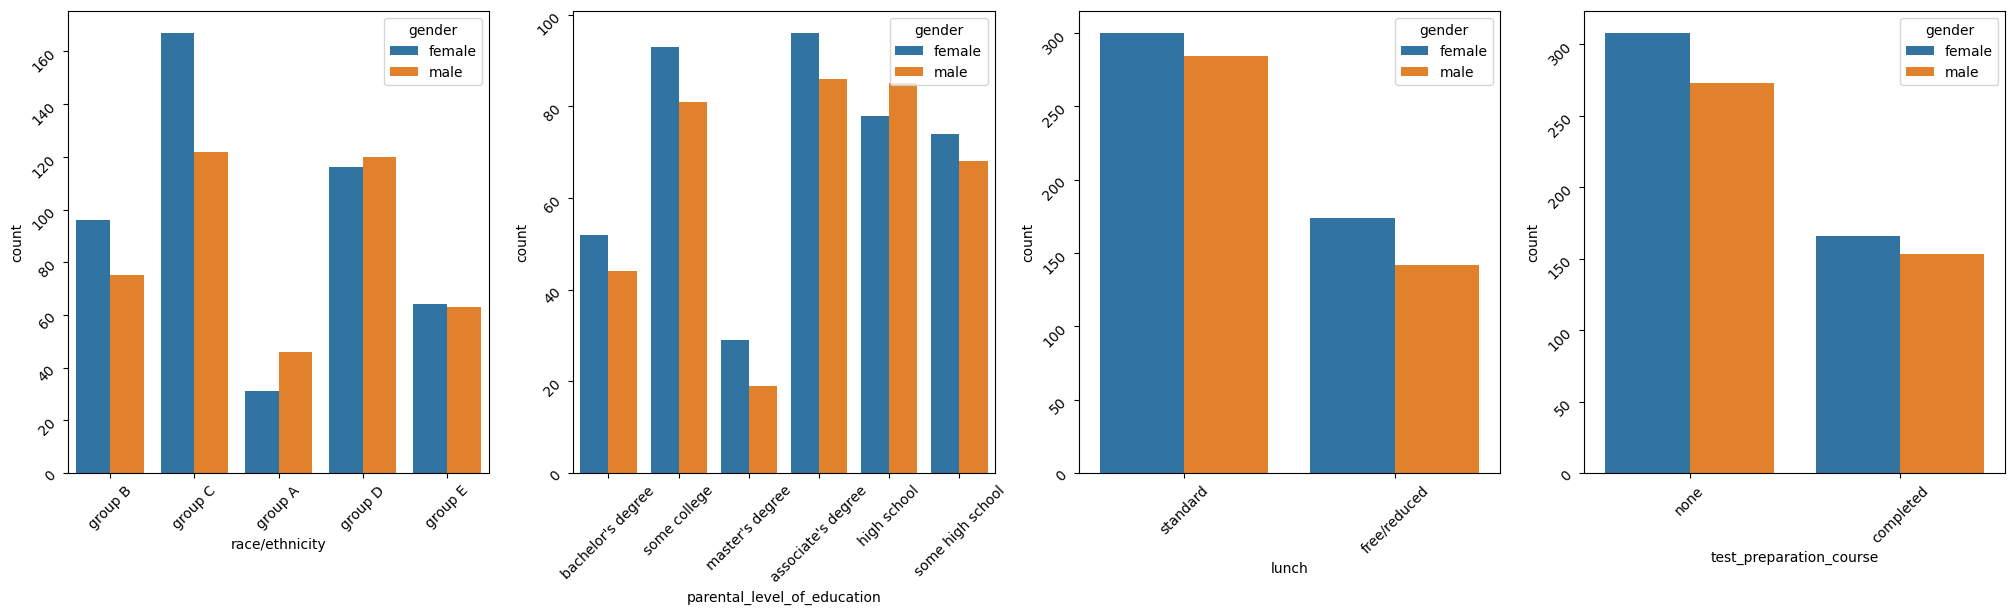

In [67]:
fig, axes = plt.subplots(1, 4, figsize=(25,6))

for ax in fig.axes:
    ax.tick_params(labelrotation=45)

for i in range(len(categoricas.iloc[:,1:].columns)):
    sns.countplot(x = categoricas.iloc[:,1:].columns[i], data = df, ax=axes[i], hue = "gender")
    
plt.show(); 

**Interpretación**: En este caso podemos ver como en general no hay grandes diferencias entre sexos. 

In [ ]:
categoricas.head(2)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed


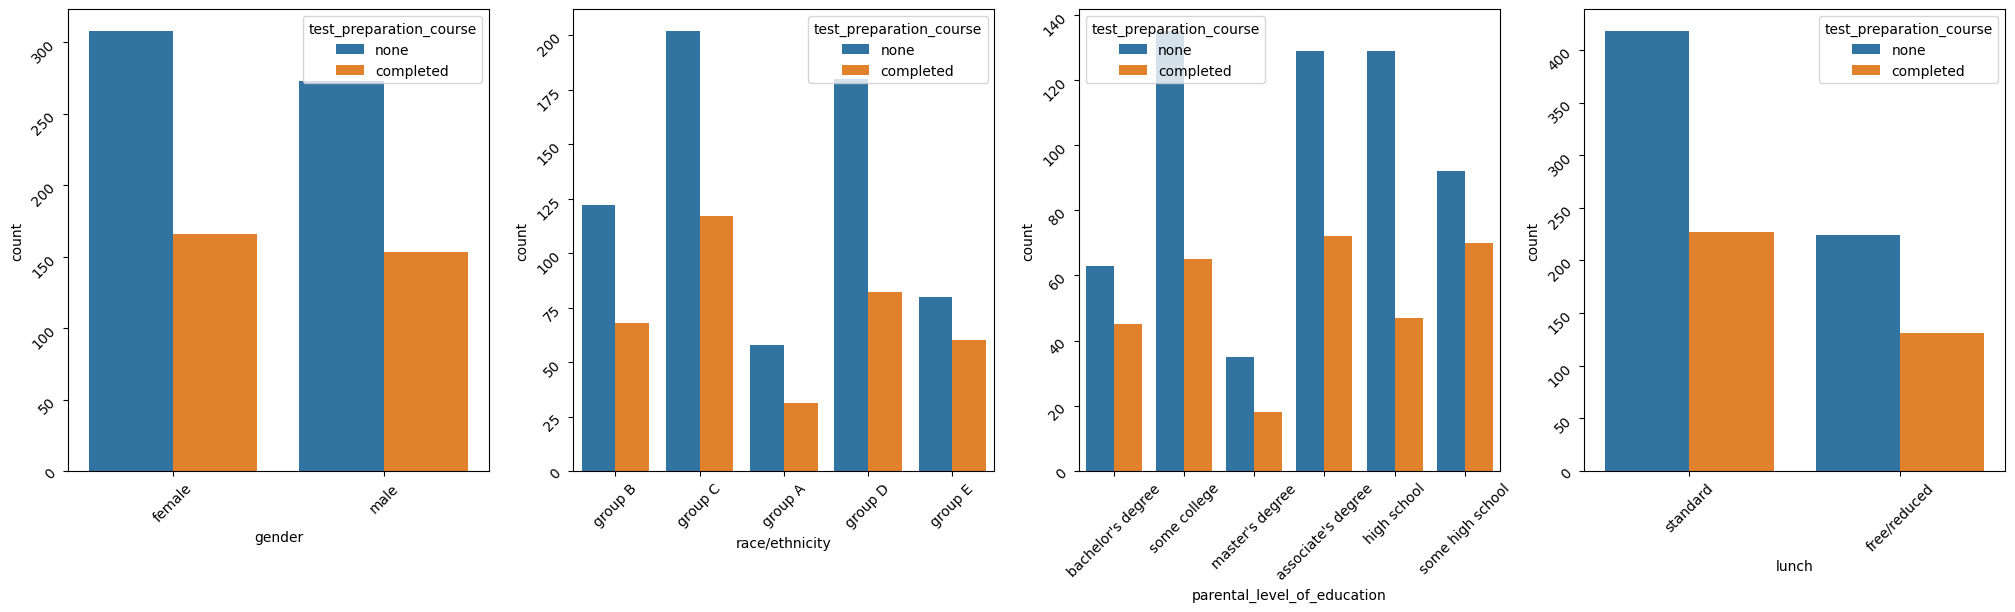

In [68]:
fig, axes = plt.subplots(1, 4, figsize=(25,6))

for ax in fig.axes:
    ax.tick_params(labelrotation=45)

for i in range(len(categoricas.iloc[:,:-1].columns)):
    sns.countplot(x = categoricas.iloc[:,:-1].columns[i], data = df, ax=axes[i], hue = "test_preparation_course")

plt.show(); 

**Interpretación**: desgranemos estos resultados. 

- Vamos con el género: vemos que no hay diferencias entre sexos entre los que han completado el test de preparación. En cuanto a los que no lo han hecho, vemos que hay menos hombres que no lo hayan hecho. 


- ¿Qué pasa con la raza? En general vemos que independientemente de la raza, hay más estudiantes que no han hecho el test de los que si. Además podemos ver como, en concreto, el grupo C y el grupo D son dos grupos donde hay un gran número de estudiantes que no lo han hecho. 


- Y con el nivel de estudios de los padres, ¿Qué pasa? De nuevo vuelven a dominar los alumnos que no hicieron el test. Pero destacan aquellos alumnos que tienen padres con tipo de estudio "some college", "high school" y "associate degree"


##  Relaciones entre variable numérica y categórica

### Swarmplot

Hemos visto que los *scatterplots* son uno de los gráficos más básicos y útiles que se pueden utilizar. En seaborn podemos llevar estos gráficos un paso más allá y usarlos para representar valores categóricos.

Un *swarmplot* es un tipo de gráfico de dispersión que se utiliza para representar valores categóricos. Es muy similar al diagrama de barras, pero evita la superposición de puntos. 


📌 No es recomendable utilizar este tipo de gráfico cuando el tamaño de la muestra es grande.

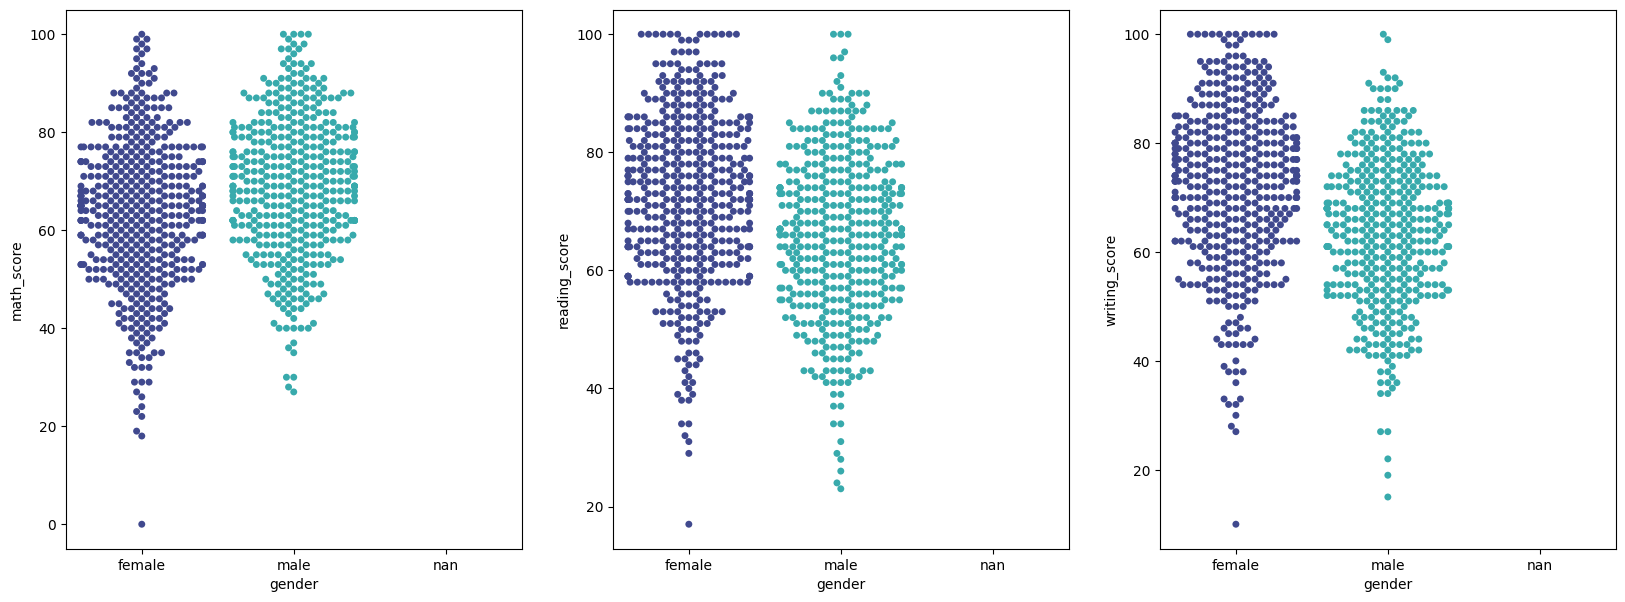

In [74]:
fig, axes = plt.subplots(1, 3, figsize=(20,7))

for i in range(len(numericas.columns)): 
    sns.swarmplot(x = 'gender', y = numericas.columns[i], data = df , ax = axes[i], palette = "mako")   

plt.show(); 

**Interpretación** Como hemos dicho, podemos observar como no hay superposición entre los puntos de nuestro gráfico. De la misma forma que en los *scatterplots* nos van a mostrar la distribución de nuestos datos. 

En el eje `X` vemos las distintas categorías de nuestra variable `gender`. Este gráfico nos ayuda a comprender en qué notas hay más alumnos. En caso de las notas de matemáticas vemos que el groso de los alumnos están en torno a los `60` de nota en mujeres. Ademas estamos viendo que las notas van desde `0` (donde tenemos una alumna) hasta `100`. Podemos ver además, que quitando esa nota de `0` las notas van desde el `20` aproximadamanete hasta el `100`. Por otro lado, vemos que los hombres la nota mínima es entorno a `30`. 

⚠️Cuando vayamos a interpretar estas notas tenemos que fijarnos en que los ejes `Y` tienen distintos valores. Es decir, en el caso de la notas de escritura, vemos que en mujeres la nota mínima esta entorno a `19` mientras que en hombres está alrededor de `22`. 


### Violinplot

Es una combinación de un *boxplot* y un diagrama de densidad girado y colocado a cada lado, para mostrar la forma de distribución de los datos. La barra negra gruesa en el centro representa el intervalo intercuartil, la barra negra fina que se extiende desde ella, representa el 95 % de los intervalos de confianza, y el punto blanco es la mediana.

**Cuando utilizarlo**: lo usaremos para visualizar la distribución de los datos y su densidad de probabilidad.


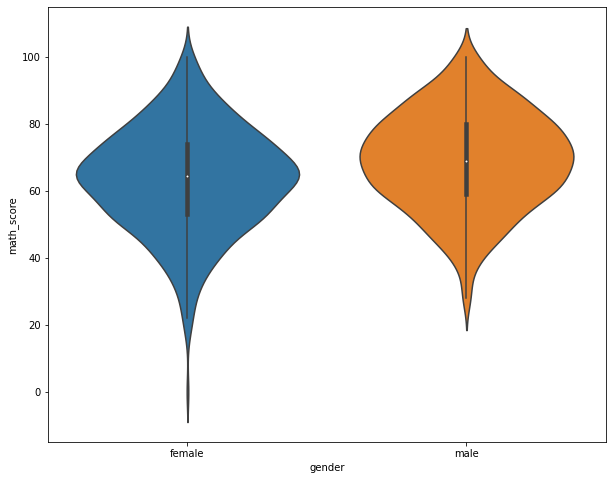

In [ ]:
sns.violinplot(x="gender", y="math_score", data=df); 

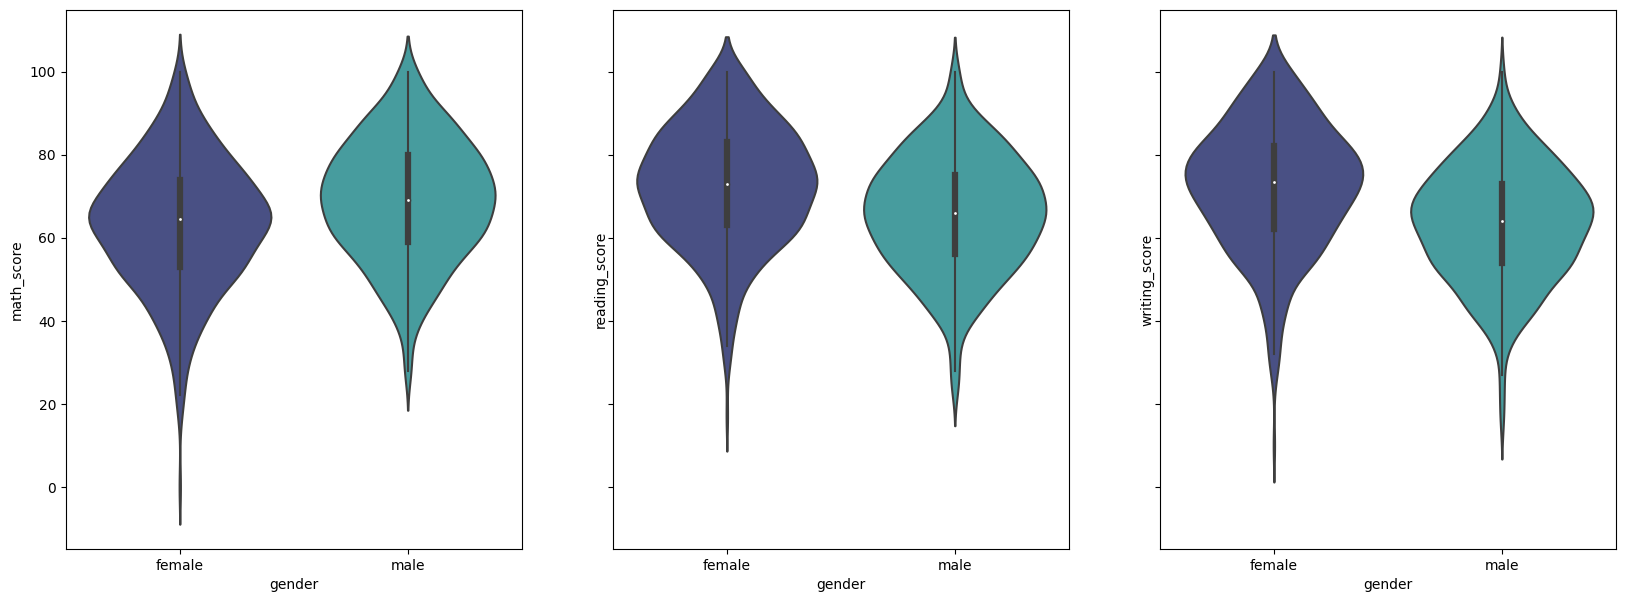

In [75]:
fig, axes = plt.subplots(1, 3, figsize=(20,7), sharey = True)

for i in range(len(numericas.columns)): 
    sns.violinplot(x ='gender', y = numericas.columns[i], data = df , ax = axes[i], palette = "mako")   

plt.show(); 

**Interpretación** lo interpretaremos de la misma forma que un *swarmplot* ya que nos va a dar información sobre la distribución de nuestros datos. 

### Pointplot

Los `pointplot` son otra alternativa a las gráficas de barras (también muestran por defecto el valor medio junto a un intervalo de confianza del 95%), pero en lugar de mostrar barras, simplemente muestra puntos a la altura adecuada y los une con una línea, reforzando el mensaje que hay detrás de la variación de un valor al siguiente. 

**Cuándo utilizarlo**: se utiliza para mostrar estimaciones puntuales e intervalos de confianza utilizando gráficos de lineas. 


In [ ]:
df.head(2)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,NaN


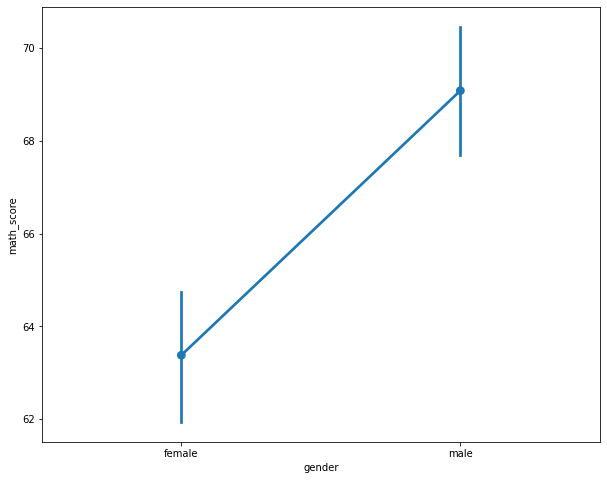

In [ ]:
sns.pointplot(x="gender", y="math_score", data=df); 

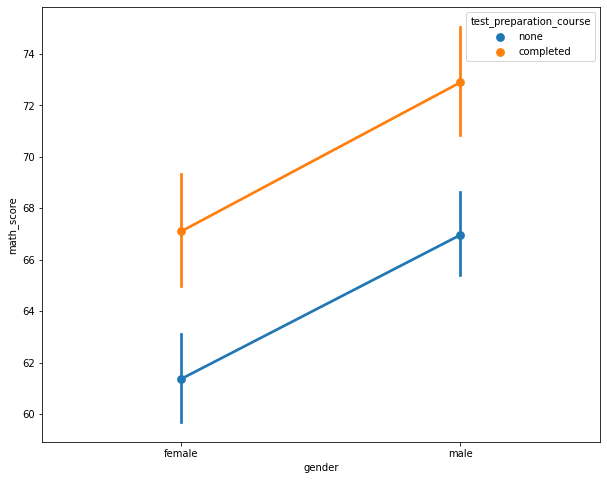

In [ ]:
# también podemos incluir un "hue" para que nos lo "divida" en función de otra variable categórica

sns.pointplot(x="gender", y="math_score", hue="test_preparation_course", data=df); 

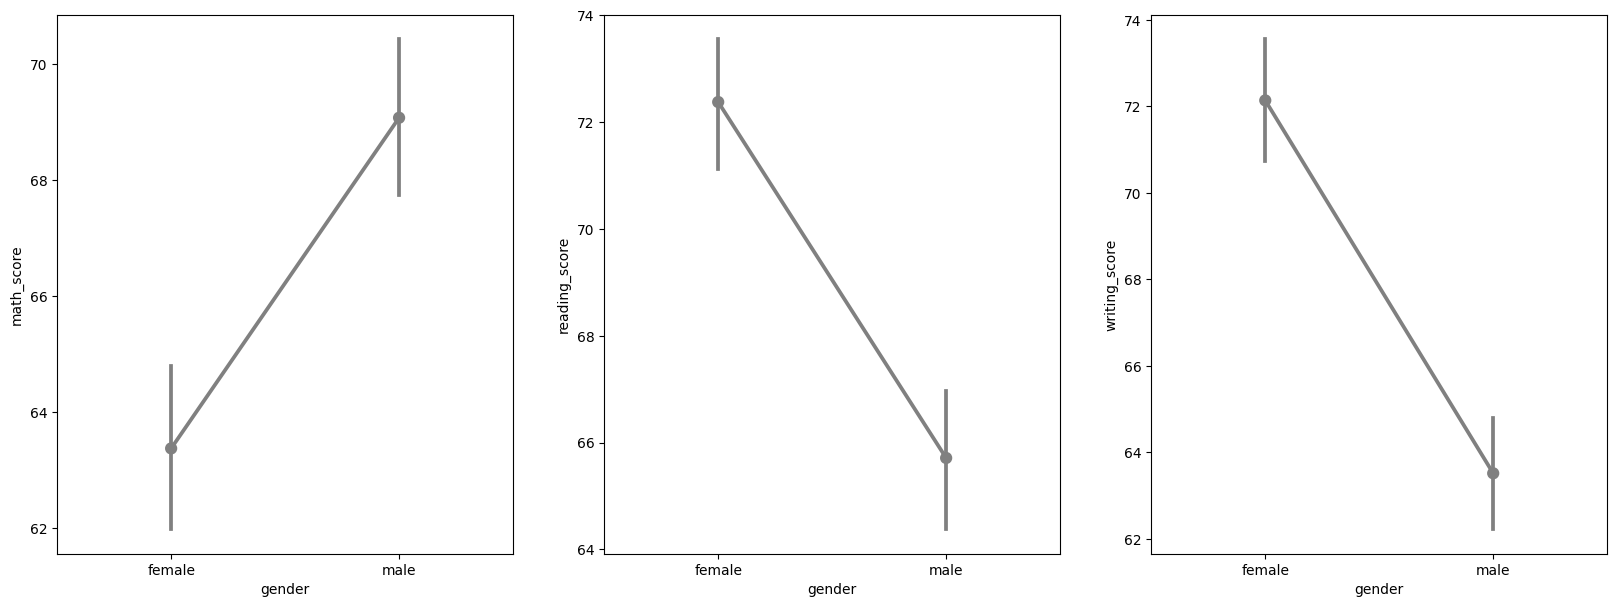

In [76]:
fig, axes = plt.subplots(1, 3, figsize=(20,7))

for i in range(len(numericas.columns)): 
    sns.pointplot(x='gender', y=numericas.columns[i], data=df, ax=axes[i], color="grey")   

plt.show(); 

**Interpretación** Lo primero que vemos en este gráfico es que las mujeres tienen notas más altas en `reading` y `writing` que los hombres. Mientras que en `math` es al contrario. Además, este gráfico nos está mostrando la desviación estándar de la media que nos devuelve. Entendámoslo con las notas de matemáticas a la izquierda. En el caso de las mujeres vemos que la media de las notas está entorno a `63`, y que esa media, con 98% de confianza, esté entre `62` y `65` (indicado por la línea vertical). En el caso de los hombres, vemos que la media está alrededor `70` y su intervalo de confianza va de `68` a `71`.

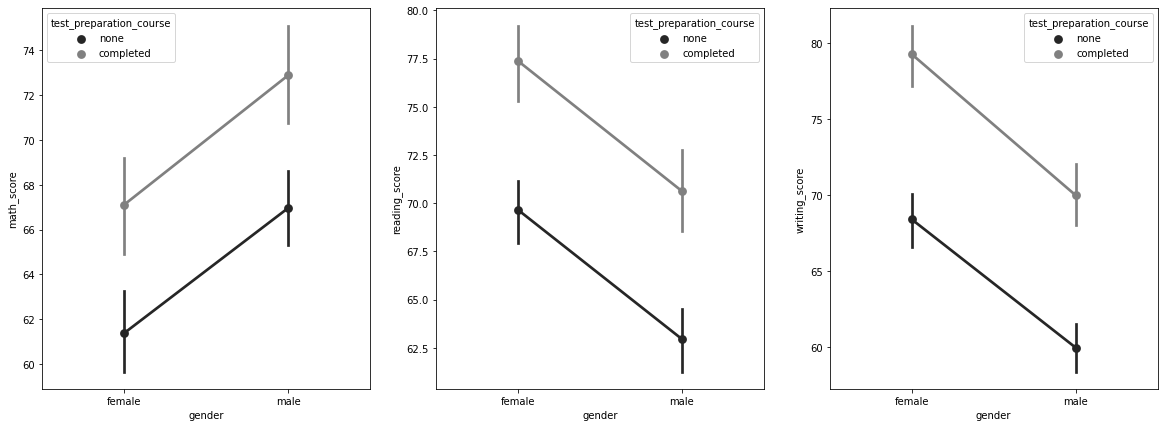

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20,7))

for i in range(len(numericas.columns)): 
    sns.pointplot(x='gender', y=numericas.columns[i], data=df , ax=axes[i], hue="test_preparation_course", color="grey")   

plt.show(); 

**Interpretación** Vemos unos patrones similares, solo que ahora podemos ver como los alumnos que no se han hecho el test previo tienen notas más bajas. 

### Boxplot

Recordamos de la clase de visualización los bordes del cuadro azul son los percentiles 25 y 75 de la distribución de todas las facturas. La línea horizontal en el cuadro muestra la mediana de la distribución.

Los puntos sobre el bigote se denominan valores atípicos. Los valores atípicos se calculan en tres pasos:

- Encuentra el rango entre cuartiles (IQR) restando el percentil 25 del 75: 75% - 25%

- El límite inferior de valores atípicos se calcula restando 1,5 veces el IQR del 25: 25% - 1,5 * IQR

- El límite superior de valores atípicos se calcula sumando 1,5 veces el IQR al 75: 75% + 1,5 * IQR

**Cuándo utilizarlo**: se debe utilizar cuando requerimos utilizar la información estadística global sobre la distribución de los datos. Se puede utilizar para detectar valores atípicos en los datos.

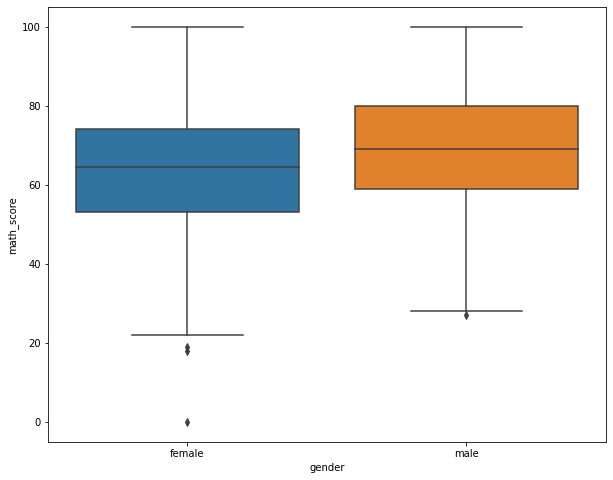

In [ ]:
sns.boxplot(x = "gender", y = "math_score", data = df); 

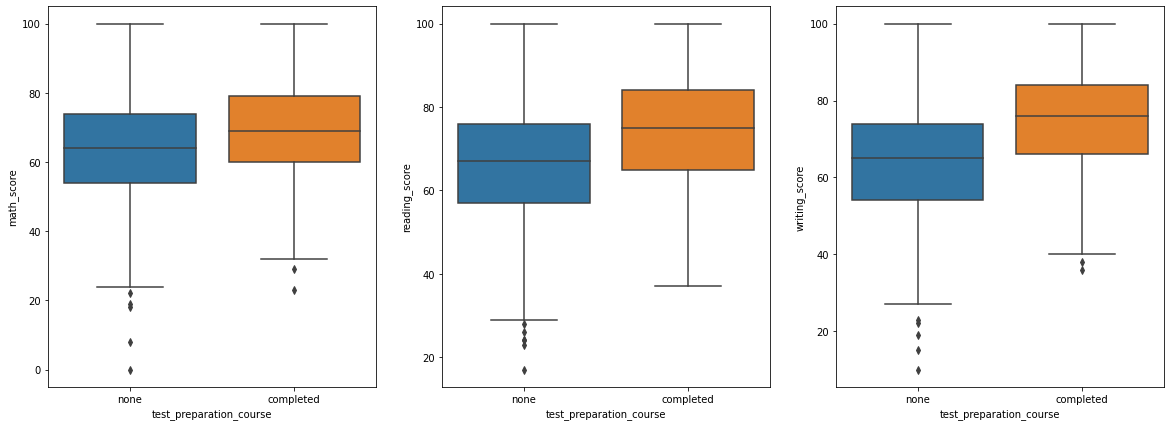

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20,7))

for i in range(len(numericas.columns)): 
    sns.boxplot(x = 'test_preparation_course', y = numericas.columns[i], data = df , ax = axes[i])   

plt.show(); 

**Interpretación** De nuevo volvemos a ver como los alumnos que se prepararon el test previo sacaron mejores notas en los examenes, independientemente del examen. 

Como hemos dicho al inicio del jupyter hemos visto las principales gráficas que podemos usar para hacer un buen exploratorio de nuestros datos, aunque es importante tener en cuenta que el mundo de la visualización es tremendamente amplio y que tenemos una gran cantidad de gráficas que podríamos usar. Este parte del análisis exploratorio se podría ampliar todo lo que nosotras queramos 😊

Igual os habéis dado cuenta que en algunos casos terminamos una línea de código con un `;`, por ejemplo en `plt.show();`. Sin ello, puede que os aparezca una línea de texto describiendo las propiedades y el tipo de la gráfica, antes de pintaros la gráfica misma. En esos casos os queda el jupyter más limpio sin esa línea, y por tanto se suele poner el `;` al final de la última línea en que pintas en la misma figura.


## EJERCICIOS

📌El objetivo de estos ejercicios no es solo hacer los gráficos sino una buena interpretación de ellos. 

Seguimos con el *dataset* de `netflix_titles`. Antes de empezar, haz que todas las figuras de nuestro jupyter tengan el mismo tamaño y que la columna `release_year` sea de tipo integer.  


In [57]:
netflix = pd.read_csv("files/netflix_titles.csv")

In [58]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [82]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [81]:
netflix['release_year'].astype(int)

0       2019
1       2016
2       2013
3       2016
4       2017
        ... 
6229    2015
6230    2016
6231    2016
6232    2013
6233    2003
Name: release_year, Length: 6234, dtype: int64

In [87]:
plt.rcParams["figure.figsize"] = (5,4)



1️⃣ Haz un *heatmap* y contesta a las siguientes preguntas: 

- ¿Existe alguna relación entre el año y las valoraciones positivas y negativas?
- ¿Existe alguna relación entre las valoraciones positivas y negativas? 
- A parte del *heatmap*, qué otro gráfico podemos usar para visualizar la relación entre las valoraciones positivas y negativas? 




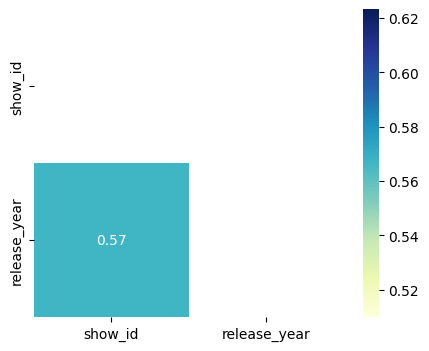

In [88]:
mask = np.triu(np.ones_like(netflix.corr(), dtype=np.bool))

sns.heatmap(netflix.corr(),
            cmap = "YlGnBu", # para cambiar el color
            mask = mask, 
            annot = True); # para sacar el valor de la correlación


In [ ]:
sns.scatterplot(x = 'math_score', y ='reading_score', data = netflix,
                s = 25, # tamaño de los marcadores   
                hue = 'gender') # puntos de distintos colores en función de la variable que indiquemos  
plt.show(); 

2️⃣ Elige el mejor gráfico para evaluar el número de tipos de entradas que tenemos en nuestro *DataFrame*.


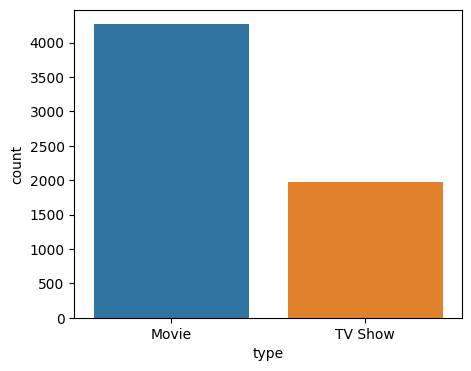

In [89]:
sns.countplot(x = 'type', data = netflix);


3️⃣ Ahora trabajaremos con la columna de `country`.

- Selecciona los paises que tengan más de 100 peliculas. 
- ¿Cuántas películas ha creado cada pais en función del tipo?
- ¿Cómo están distribuidos los datos para las variables de las puntuaciones, tanto positivas como negativas por país?
- ¿Qué pasa cuando a la gráfica anterior, incluimos el efecto del tipo de película? 


In [96]:
peliculas

,country,show_id
0,Argentina,38
1,"Argentina, Brazil, France, Poland, Germany, De...",1
2,"Argentina, Chile",1
3,"Argentina, Chile, Peru",1
4,"Argentina, France",1
...,...,...
549,"Uruguay, Spain, Mexico",1
550,Venezuela,1
551,"Venezuela, Colombia",1
552,Vietnam,4



4️⃣ Selecciona las películas del siglo XXI.

- ¿Qué año se han producido más películas? 
- ¿Qué tipo de película se ha producido más cada año? 

In [99]:
sigloxxi = netflix[netflix['release_year']>=2000]

In [100]:
sigloxxi.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [101]:
sns.countplot(x = 'show_id', data = sigloxxi, hue = 'release_year');

KeyboardInterrupt: 